# Домашнее задание к занятию «Поиск выбросов и генерация новых признаков» обновленное

## **Цель:**  
Изучить применение методов по поиску выбросов в данных, попрактиковаться в обработке экстремальных значений.

### **Описание задания:**  
В домашнем задании нужно решить задачу классификации типа стекол. Данные для обучения моделей можно скачать с [сайта](https://www.kaggle.com/datasets/uciml/glass). Целевая переменная – тип стекла «Type». Остальные признаки описывают химические элементы в составе материала. Датасет нужно исследовать на наличие выбросов, провести EDA.

### **Этапы работы:**  
1. Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cd C:\Users\grebe\Documents\EDUCATION\Машинное обучение фундаментальные инструменты и практики\Работа с признаками и построение моделей\Поиск выбросов и генерация новых признаков

C:\Users\grebe\Documents\EDUCATION\Машинное обучение фундаментальные инструменты и практики\Работа с признаками и построение моделей\Поиск выбросов и генерация новых признаков


In [3]:
df = pd.read_csv('glass.csv')

In [4]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


2. Проведите первичный анализ.
   а) Проверьте количество записей для каждого класса. Сделайте вывод.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


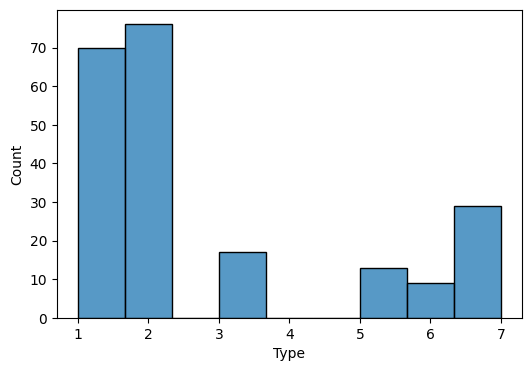

In [6]:
plt.figure(figsize=[6,4])
sns.histplot(data = df, x = df.Type)
plt.show()

In [7]:
df.groupby('Type').count()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
Type,,,,,,,,,
1,70,70,70,70,70,70,70,70,70
2,76,76,76,76,76,76,76,76,76
3,17,17,17,17,17,17,17,17,17
5,13,13,13,13,13,13,13,13,13
6,9,9,9,9,9,9,9,9,9
7,29,29,29,29,29,29,29,29,29


#### Вывод: В основном, большинство записей соответствуют классам 1 и 2. Записей для класса 4 нет.

3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df.iloc[:,:-1]

In [10]:
y = df['Type']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

4. Обучите модель дерева решений [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) на обучающем множестве.

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
model = RandomForestClassifier(random_state=30)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=30)

5. Для тестового множества предскажите тип стекла и сравните с истинным значением, посчитав точность предсказания модели (accuracy).

In [14]:
y_pred = model.predict(X_test)
model.score(X_train, y_train)

1.0

In [15]:
model.score(X_test, y_test)

0.8372093023255814

In [16]:
sum(y_test == y_pred)/len(y_test) # посчитали точность сами

0.8372093023255814

6. Обработайте выбросы в данных.  
а) Визуализируйте распределение значений для каждой переменной. Можно использовать функции [sns.boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html), [sns.distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html). Есть ли признаки с нормальным распределением?  
b) Исследуйте признаки на выбросы несколькими способами.  
c) Удалите выбросы. *Посчитайте процент удаленных записей от общего числа записей для каждого класса.

In [17]:
sns.set(rc={'figure.figsize':(16,3)})
sns.set_style(style = 'dark')
sns.set(font_scale=1)

In [18]:
import warnings
warnings.filterwarnings("ignore")

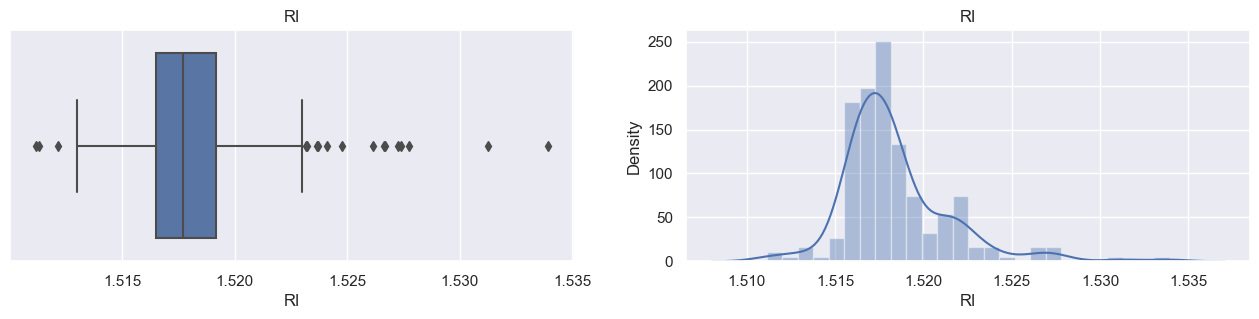

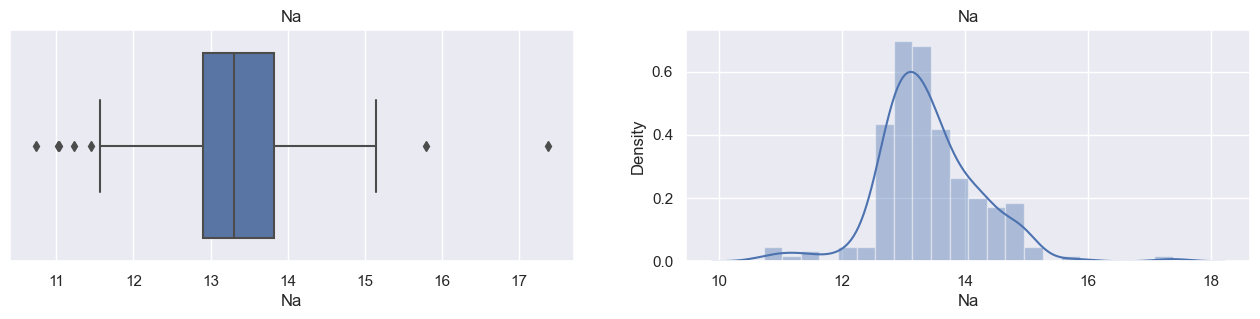

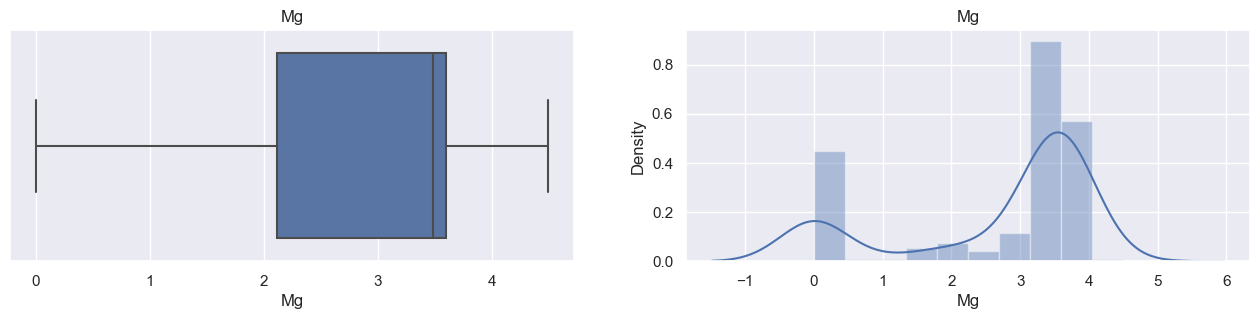

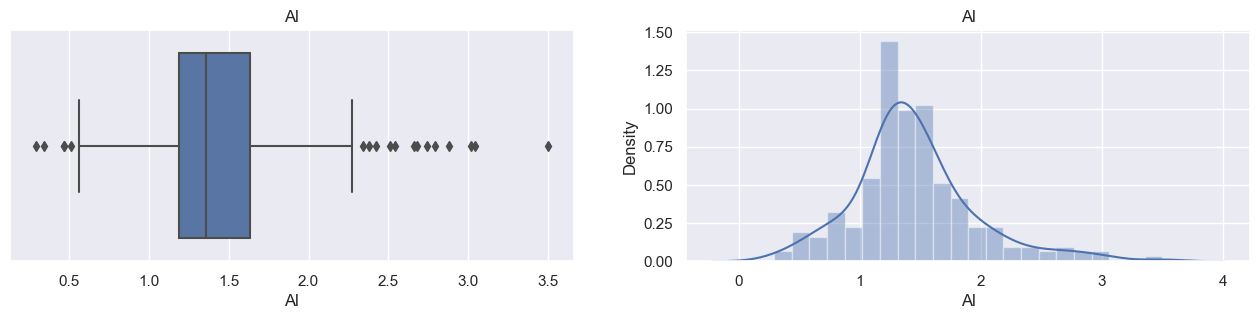

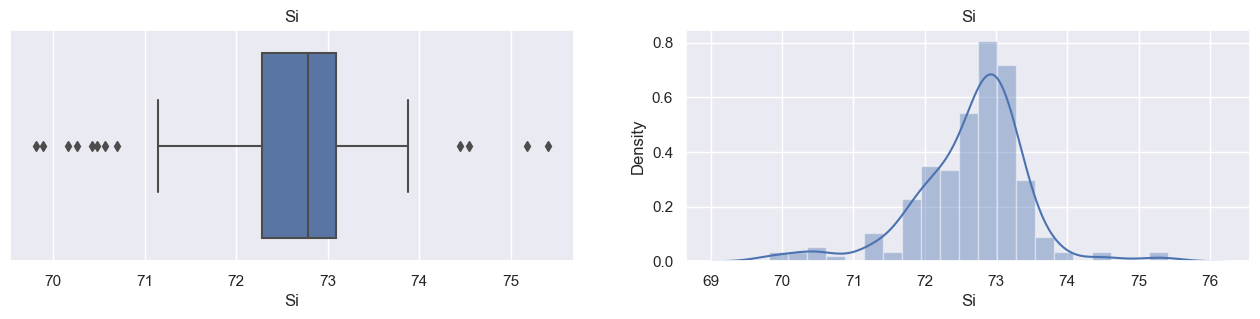

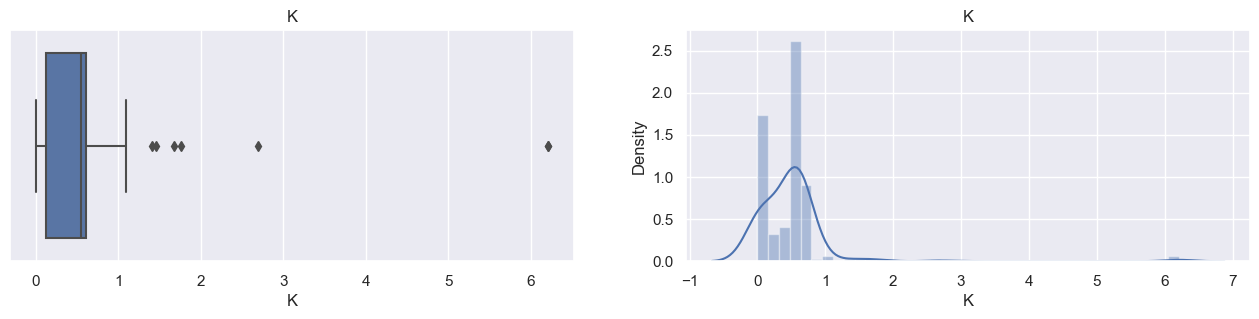

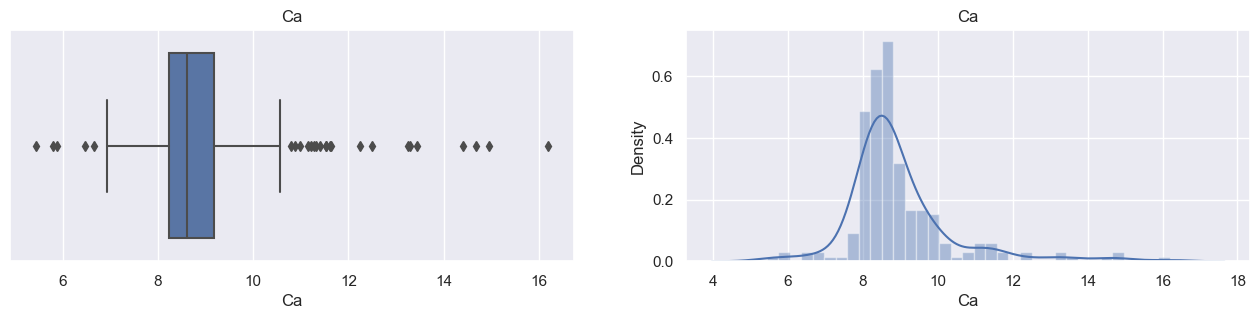

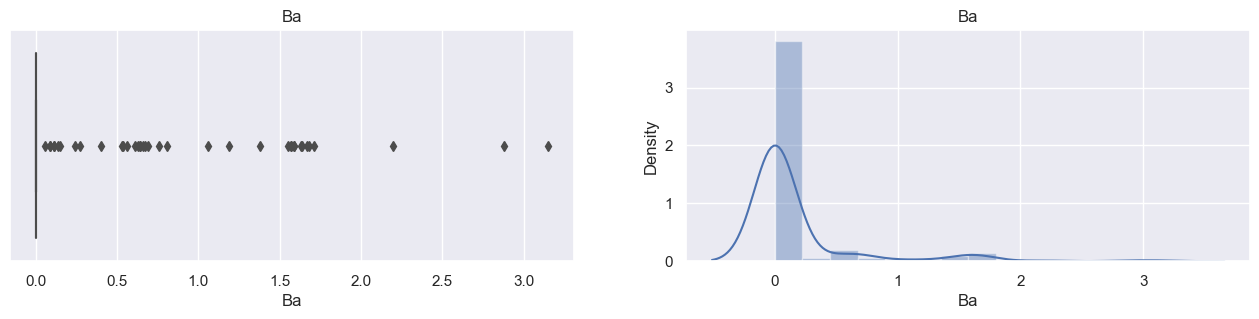

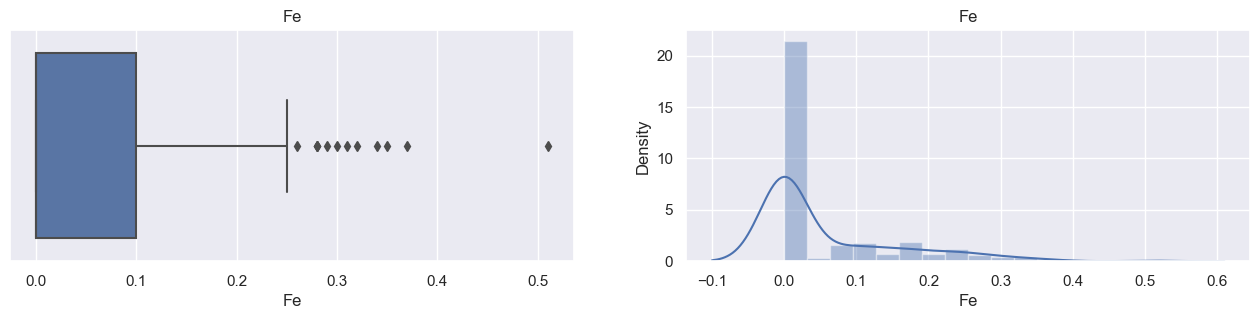

In [19]:
for i in X.columns.to_list():
    plt.subplot(1,2,1)
    sns.boxplot(x=X[i])
    plt.title(i)
    plt.subplot(1,2,2)
    sns.distplot(X[i])
    plt.title(i)
    plt.show()

#### Визуально, по всем признакам есть выбросы.

#### Проверим по каждому признаку взята ли выборка из нормального распределения при помощи критерия Шапиро-Уилка

In [20]:
from scipy.stats import shapiro #Shapiro-Wilk test for normality

In [21]:
for i in X.columns.to_list():
    print(f'Distribution of {i} = {shapiro(X[i])}') 

Distribution of RI = ShapiroResult(statistic=0.8675718903541565, pvalue=1.0766247919222205e-12)
Distribution of Na = ShapiroResult(statistic=0.9457632303237915, pvalue=3.4662537018448347e-07)
Distribution of Mg = ShapiroResult(statistic=0.699336588382721, pvalue=2.3909611661875223e-19)
Distribution of Al = ShapiroResult(statistic=0.9434122443199158, pvalue=2.083013299625236e-07)
Distribution of Si = ShapiroResult(statistic=0.9196622967720032, pvalue=2.175188917874493e-09)
Distribution of K = ShapiroResult(statistic=0.44161754846572876, pvalue=2.1721965417791313e-25)
Distribution of Ca = ShapiroResult(statistic=0.7938679456710815, pvalue=4.2866203996304243e-16)
Distribution of Ba = ShapiroResult(statistic=0.4085649847984314, pvalue=5.383263238128378e-26)
Distribution of Fe = ShapiroResult(statistic=0.653200089931488, pvalue=1.156668784076633e-20)


#### Формально тесты на нормальность не прошли, поскольку p значительно меньше 0.05, поэтому полагаем, что все выборки по признакам сделаны из не-нормальных распределений. Скорее всего выбросы повлияли на результат теста.

### Исследуем на выбросы тремя способами:  
а) IsolationForest,  
b) Neighbors-LocalOutlierFactor,  
c) OneClassSVM.

In [22]:
 from sklearn.ensemble import IsolationForest

In [23]:
clf_if = IsolationForest(random_state = 30)
clf_if.fit(X)

IsolationForest(random_state=30)

In [24]:
if_pred = clf_if.predict(X)

In [25]:
from sklearn.neighbors import LocalOutlierFactor

In [26]:
clf_LOF = LocalOutlierFactor()
LOF_pred = clf_LOF.fit_predict(X)

In [27]:
from sklearn.svm import OneClassSVM

In [28]:
clf_OCSVM = OneClassSVM(gamma='auto').fit(X)
OCSVM_pred = clf_OCSVM.predict(X)

In [29]:
data = {'if_method':if_pred, 'LOF_method':LOF_pred, 'OCSVM_method':OCSVM_pred}

In [30]:
dt = pd.DataFrame(data)

##### число выбросов, предсказанных каждым методом:

In [31]:
dt[dt==-1].count()

if_method        20
LOF_method       37
OCSVM_method    108
dtype: int64

#### Получается, что метод OneClassSVM предсказал слишком много выбросов для последующего анализа, что видно также визуально на гистограммах и боксплотах, поэтому его далее не используем. 37 выбросов, предсказанных LOF тоже не мало (почти 20% всех строк), но оставим для сравнения с IsolationForest.

In [32]:
data = pd.concat([df,dt.iloc[:,:-1]], axis =1)

In [33]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,if_method,LOF_method
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1,1


In [34]:
data[['Type','if_method']].groupby('Type').value_counts(normalize=True)*100

Type  if_method
1      1           100.000000
2      1            89.473684
      -1            10.526316
3      1           100.000000
5      1            69.230769
      -1            30.769231
6      1            77.777778
      -1            22.222222
7      1            79.310345
      -1            20.689655
Name: proportion, dtype: float64

##### Видим процент от общего числа выбросов по каждому классу:  
1 класс: 0%
2 класс: 10.5%
3 класс: 0%
5 класс: 30.8%
6 класс: 22%
7 класс: 20.7%

7. Повторите п. 4, п. 5.

In [35]:
# смотрим на точность при удалении выбросов по методу IsolationForest
data_if = data.query('if_method ==1')

In [36]:
y = data_if.iloc[:, 9]
X = data_if.iloc[:,0:9]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [37]:
model = RandomForestClassifier(random_state=30)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=30)

In [38]:
y_pred = model.predict(X_test)
model.score(X_train, y_train)

1.0

In [39]:
model.score(X_test, y_test)

0.8461538461538461

In [40]:
# смотрим на точность при удалении выбросов по методу Neighbors-LocalOutlierFactor
data_LOF = data.query('LOF_method ==1')

In [41]:
y = data_LOF.iloc[:, 9]
X = data_LOF.iloc[:,0:9]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [42]:
model = RandomForestClassifier(random_state=30)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=30)

In [43]:
y_pred = model.predict(X_test)
model.score(X_train, y_train)

1.0

In [44]:
model.score(X_test, y_test)

0.7222222222222222

8. Сформулируйте выводы по проделанной работе.  
а) Кратко опишите, какие преобразования были сделаны с данными.  
b) Сравните точность двух моделей.  
c) Напишите свое мнение, нужно ли исследовать данные на выбросы, для чего это делается, плюсы и минусы подхода.  

а) Применялся метод RandomForestClassifier для классификации типов стёкл по признакам в начальной выборке и в выборках с удалёнными выбросами по 2-м разным методам (IsolationForest, Neighbors-LocalOutlierFactor). При этом в случае Neighbors-LocalOutlierFactor метода удаления выбросов было удалено больше данных (~20% от всех строк). 3-й метод удаления выбросов OneClassSVM не использовался, поскольку он показал необходимость удаления больше половины данных.  

б) По результатам сравнения 3 моделей (без удаления выбросов, удаление выбросов по методу IsolationForest, удаление выбросов по методу NLOF) наилучший результат по точности был достигнут на 2 моделе с удалением выбросов по методу IsolationForest (0.8461), 2-й результат у 1 модели без удаления выбросов (0.8372).  

в) Итого: удаление выбросов помогает в улучшении точности, но удаление выбросов необходимо проводить аккуратно, чтобы не было удалено излишнее количество данных, что может повлиять на результат отрицательно как в 3-й модели, где точность упала до 0.7222.

In [46]:
pwd

'C:\\Users\\grebe\\Documents\\EDUCATION\\Машинное обучение фундаментальные инструменты и практики\\Работа с признаками и построение моделей\\Поиск выбросов и генерация новых признаков'